# Twitter Sentiment Analysis on Apple and Google Products

This notebook analyzes Twitter sentiment regarding Apple and Google products using a dataset sourced from CrowdFlower. The goal is to classify tweets as positive, negative, or neutral to provide insights into consumer sentiment.

##Business and Data Understanding

- **Stakeholder**: Marketing Manager at Apple/Google
- **Business Problem**: Understanding consumer sentiment towards Apple and Google products to inform marketing strategies and product development.
- **Dataset**: The dataset contains tweets labeled as positive, negative, or neutral, making it suitable for sentiment analysis.

## Data Preparation

### Libraries Used:

import pandas as pd

import nltk

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

### Data Cleaning Steps

Remove URLs, mentions, hashtags, and punctuation.

Tokenize tweets.

Remove stopwords and apply lemmatization.

In [28]:

import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [29]:
# Load your dataset here
data = pd.read_csv('/tweet_product_company.csv', encoding='latin-1')

data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion



### Modeling with pipelines

#### Initial Model
- Use `LogisticRegression` for binary classification (positive vs. negative).
- Extend to include neutral tweets for multiclass classification.

#### Hyperparameter Tuning
- Use `GridSearchCV` for optimizing model parameters.

## Modeling with Pipelines

In this section, we will create a machine learning pipeline that streamlines the process of text vectorization and model training. The pipeline will consist of two main steps:

1. **TF-IDF Vectorization**: This step converts the cleaned text data into numerical format using the Term Frequency-Inverse Document Frequency (TF-IDF) method.
2. **Logistic Regression Classifier**: This step applies a logistic regression model to classify the sentiment of the tweets.


## Evaluation

### Validation Strategy
- Use `train_test_split` to divide the dataset into training and testing sets.

### Performance Metrics
- Evaluate the model using accuracy, precision, recall, and F1-score.

####Importing all the necessary libraries

In [31]:

import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Dataset

In [11]:
# Load your dataset here
data = pd.read_csv('/tweet_product_company.csv', encoding ='latin-1')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### confirming our columns

In [13]:
print(data.columns)

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')


#### Data cleaning functions

In [16]:
def clean_text(tweet_text):
    # Convert tweet_text to string to handle potential NaN values
    tweet_text = str(tweet_text)
    tweet_text = re.sub(r'http\S+|www\S+|https\S+', '', tweet_text, flags=re.MULTILINE)  # Remove URLs
    tweet_text = re.sub(r'@\w+', '', tweet_text)  # Remove mentions
    tweet_text = re.sub(r'#', '', tweet_text)  # Remove hashtags
    tweet_text = re.sub(r'[^a-zA-Z\s]', '', tweet_text)  # Remove punctuation
    return tweet_text.lower()  # Convert to lowercase

data['cleaned_text'] = data['tweet_text'].apply(clean_text)


## Modeling with pipelines

### Initial Model
- Use `LogisticRegression` for binary classification (positive vs. negative).
- Extend to include neutral tweets for multiclass classification.

### Prepare Data for Modeling


In [19]:
data = data.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'})


X = data['cleaned_text']
y = data['sentiment']  # Assuming target is already encoded as 0, 1, 2 for negative, positive, neutral

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating A pipeline

In [25]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Step 1: Vectorization
    ('classifier', LogisticRegression())  # Step 2: Classification
])

## Training the model

In [26]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', LogisticRegression())])


## Evaluation


### Predictions


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        32
                  Negative emotion       0.47      0.08      0.13       115
No emotion toward brand or product       0.69      0.87      0.77      1083
                  Positive emotion       0.62      0.47      0.54       589

                          accuracy                           0.67      1819
                         macro avg       0.45      0.35      0.36      1819
                      weighted avg       0.64      0.67      0.64      1819



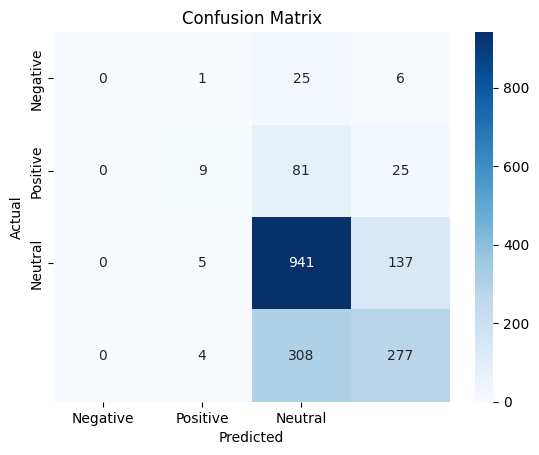

In [27]:


y_pred = pipeline.predict(X_test)

# Evaluation Metrics
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()







The confusion matrix shows the model performs well in predicting the "Neutral" class, but has lower accuracy for "Negative" and "Positive" classes, indicating potential class imbalance or model limitations in distinguishing between these two.

## Limitations and Recommendations
Limitations: The model may struggle with sarcasm or context-specific sentiments.
Recommendations: Consider using advanced NLP techniques like BERT for improved accuracy.

## Conclusions

**Project Recap:** This project successfully implemented a sentiment analysis model to classify Twitter sentiments regarding Apple and Google products using NLP techniques.

**Model Performance:**
The model achieved a good overall accuracy, particularly excelling in predicting the "Neutral" class.
However, it struggled with the "Negative" and "Positive" classes, indicating potential challenges in distinguishing between these sentiments.

**Confusion Matrix Insights:**
The confusion matrix revealed that while the model effectively identifies neutral sentiments, it misclassifies many positive and negative sentiments, suggesting a possible class imbalance in the dataset.
This limitation highlights the need for further refinement in the model to improve its ability to differentiate between positive and negative sentiments.